In [2]:
import pandas as pd
import numpy as np

#### `Counting missing rows with left join`
- The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the __movies__ table and the __financials__ table.
- The movies and financials tables have been loaded for you.

In [3]:
financials = pd.read_pickle('../../datasets/financials.p')
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [4]:
movies = pd.read_pickle('../../datasets/movies.p')
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


##### Quest 1 CH-2
- Merge the __movies__ table, as the left table, with the __financials__ table using a left join, and save the result to __movies_financials__.

In [5]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on='id', how='left')
movies_financials.head()

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


##### Quest 1.1 CH-2
- Count the number of rows in __movies_financials__ with a null value in the __budget__ column.

In [6]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


#### `Enriching a dataset`
- Setting __how='left'__ with the __.merge()__ method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series _Toy Story_. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

- The __toy_story__ DataFrame contains the Toy Story movies. The __toy_story__ and __taglines__ DataFrames have been loaded for you.

In [7]:
toy_story = pd.read_csv('../../datasets/toy_story.csv')
toy_story.head()

,id,title,popularity,release_date
0,10193,Toy Story 3,59.995,2010-06-16
1,863,Toy Story 2,73.575,1999-10-30
2,862,Toy Story,73.640,1995-10-30


In [8]:
taglines = pd.read_pickle('../../datasets/taglines.p')
taglines.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


#### Quest 2 CH-2
- Merge __toy_story__ and __taglines__ on the __id__ column with a left join, and save the result as __toystory_tag__.

In [9]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on='id', how='left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
2    862    Toy Story      73.640   1995-10-30                       NaN
(3, 5)


#### Quest 2.1 CH-2 
- With __toy_story__ as the left table, merge to it __taglines__ on the __id__ column with an ___inner join___, and save as __toystory_tag__.

In [10]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id', how='inner')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
(2, 5)


#### `How many rows with a left join?`
- Select the true statement about left joins.
- Try running the following code statements in the IPython shell.

- __left_table.merge(one_to_one, on='id', how='left').shape__
- __left_table.merge(one_to_many, on='id', how='left').shape__
Note that the __left_table__ starts out with __4__ rows.

#### `Possible answers`

- The output of a _one-to-one_ merge with a left join will have __more__ rows than the left table.

- The output of a _one-to-one_ merge with a left join will have __fewer__ rows than the left table.

- `The output of a _one-to-many_ merge with a left join will have greater than or equal rows than the left table.`
That's correct! A left join will return all of the rows from the left table. If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. Therefore, the returned rows must be equal to if not greater than the left table. Knowing what to expect is useful in troubleshooting any suspicious merges.

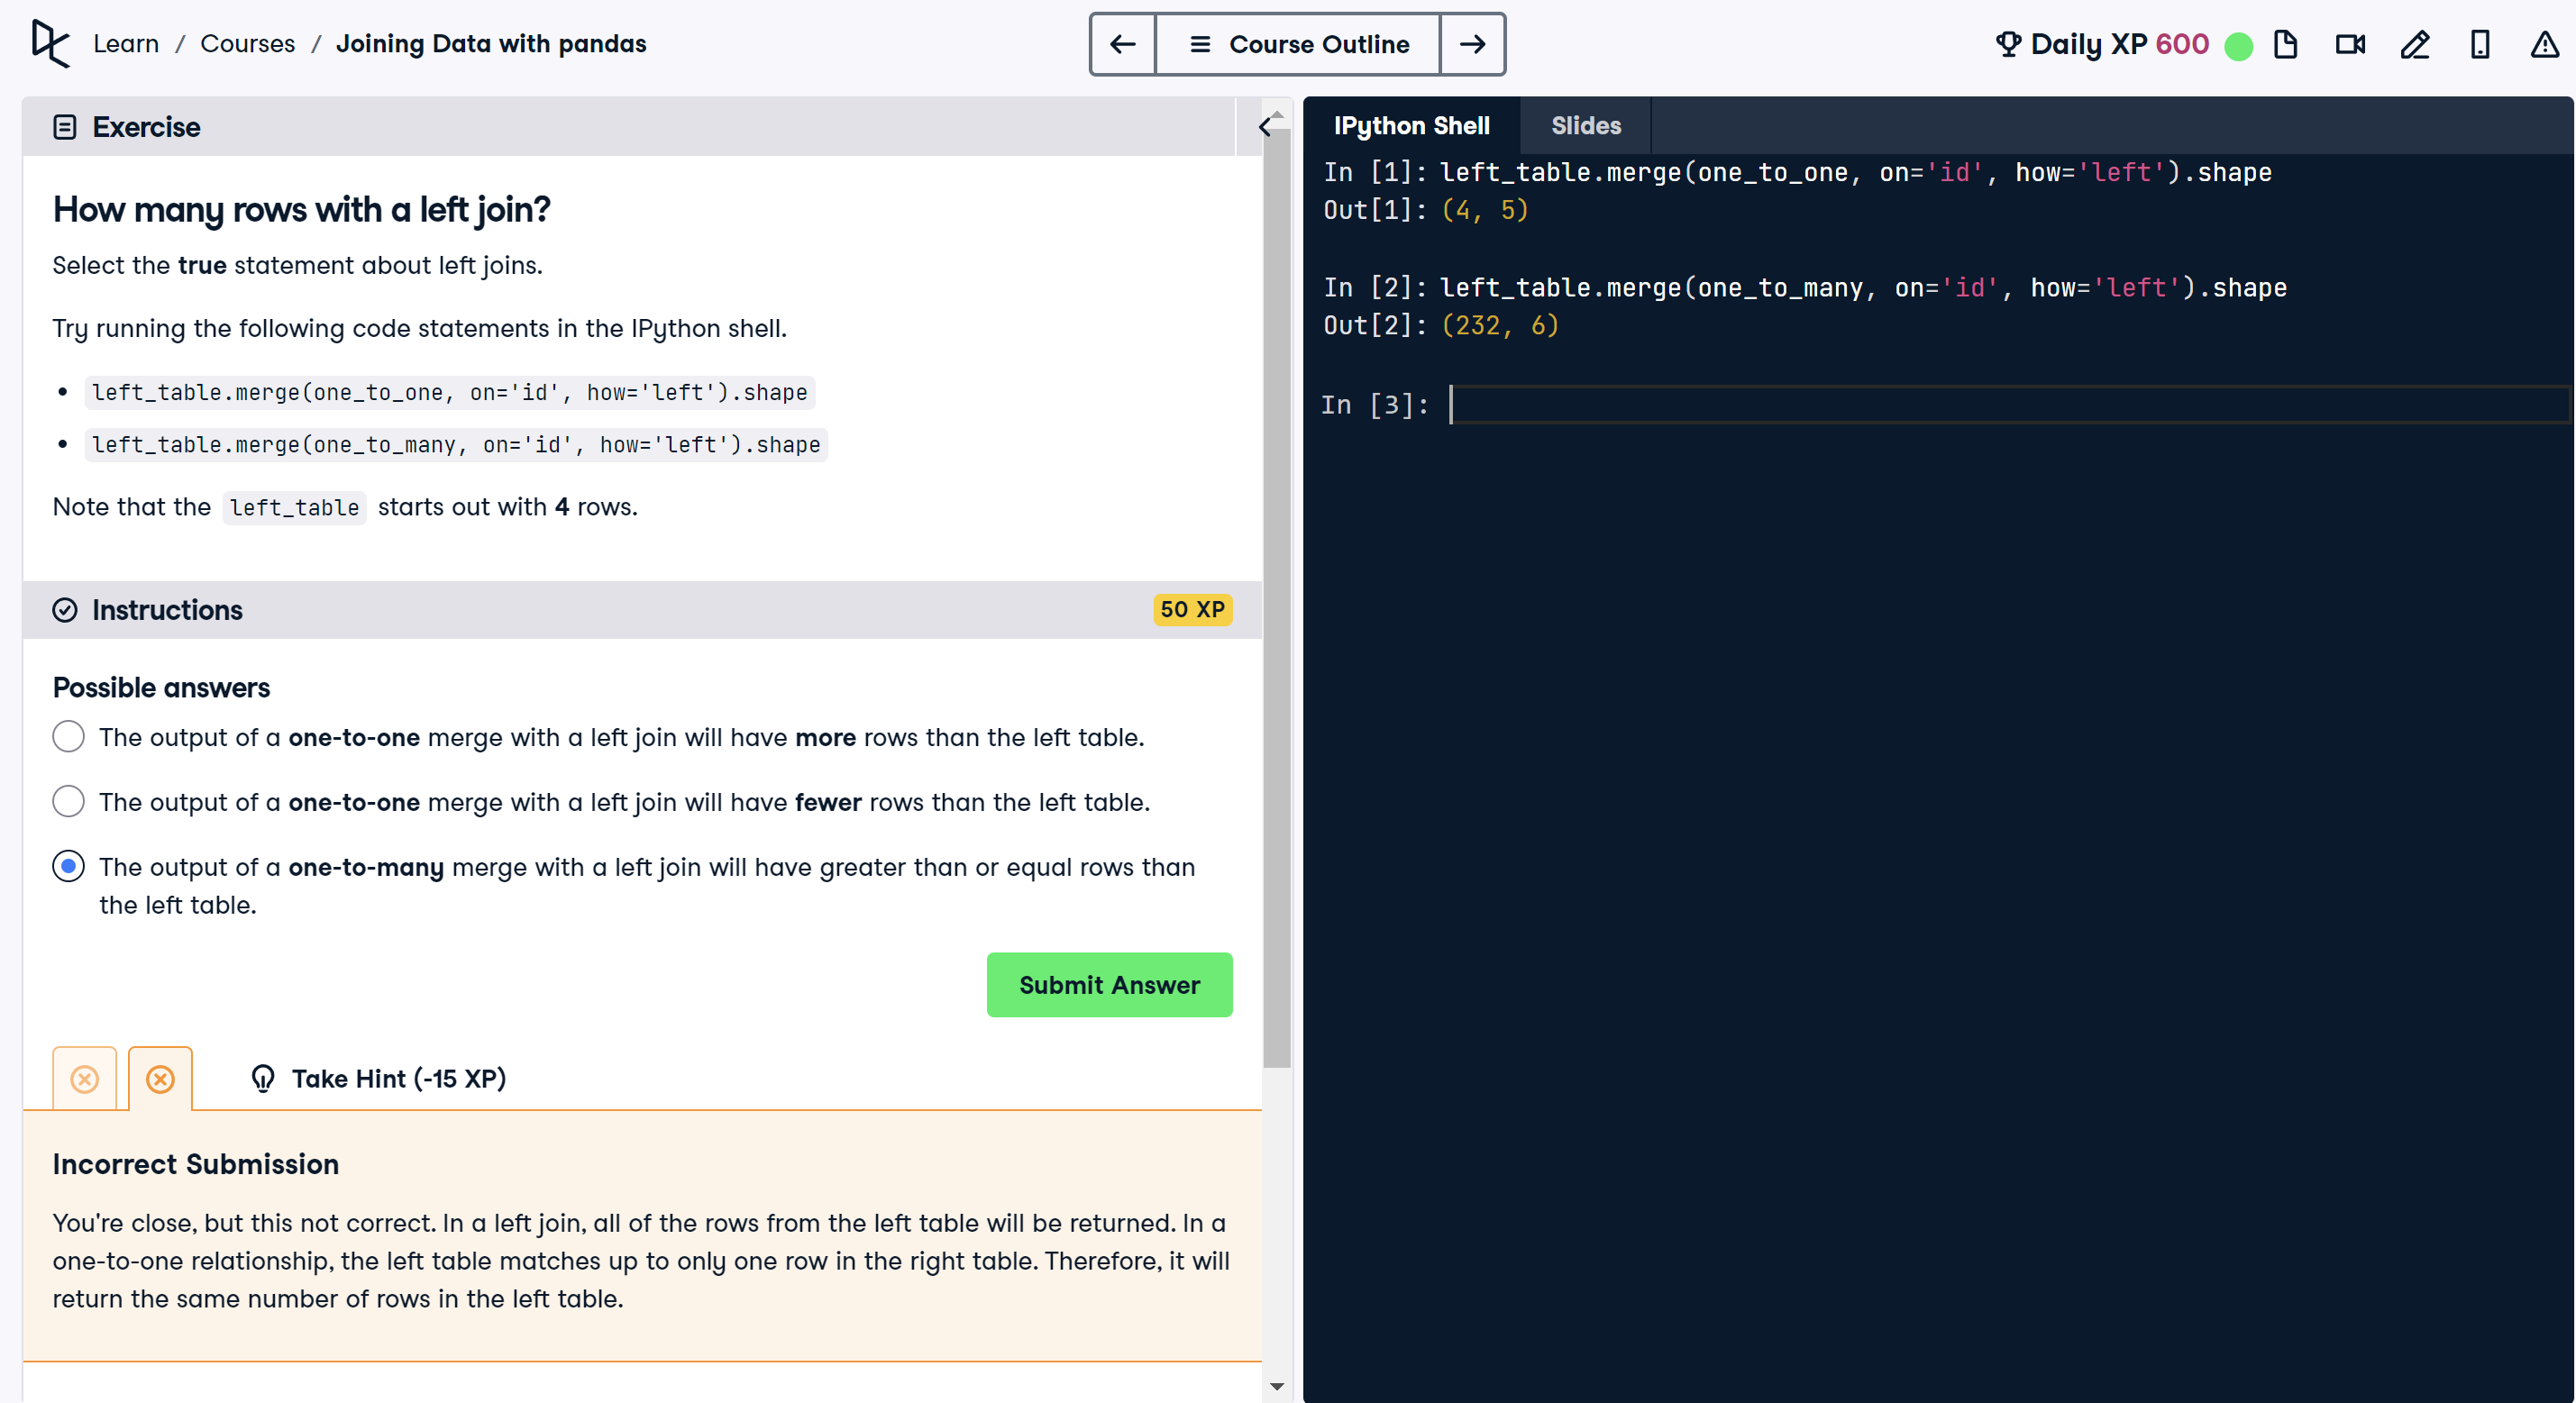

#### `Right join to find unique movies`
- Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called __scifi_movies__ and another table of action movies called __action_movies__. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the __movies__ table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

- The __movies__, __scifi_movies__, and __action_movies__ tables have been loaded for you.

In [11]:
movies = pd.read_pickle('../../datasets/movies.p')
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [12]:
movies_to_genre = pd.read_pickle('../../datasets/movie_to_genres.p')
movies_to_genre.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [13]:
act_mov = movies_to_genre.loc[movies_to_genre['genre'] == 'Action']
print(act_mov)

       movie_id   genre
3            11  Action
14           18  Action
25           22  Action
26           24  Action
42           58  Action
...         ...     ...
12126    381902  Action
12128    385383  Action
12136    389425  Action
12144    407887  Action
12151    417859  Action

[1154 rows x 2 columns]


In [14]:
act_mov.to_csv('action_movies.csv', index=False)

In [15]:
action_movies = pd.read_csv('../../datasets/action_movies.csv')
action_movies.head()

,movie_id,genre
0,11,Action
1,18,Action
2,22,Action
3,24,Action
4,58,Action


In [16]:
scif_mov = movies_to_genre.loc[movies_to_genre['genre'] == 'Science Fiction']
print(scif_mov)

       movie_id            genre
2            11  Science Fiction
17           18  Science Fiction
20           19  Science Fiction
38           38  Science Fiction
49           62  Science Fiction
...         ...              ...
12000    335866  Science Fiction
12020    347548  Science Fiction
12063    360188  Science Fiction
12092    367551  Science Fiction
12100    371690  Science Fiction

[535 rows x 2 columns]


In [17]:
scif_mov.to_csv('scifi_movies.csv', index=False)

In [18]:
scifi_movies = pd.read_csv('../../datasets/scifi_movies.csv')
scifi_movies.head()

,movie_id,genre
0,11,Science Fiction
1,18,Science Fiction
2,19,Science Fiction
3,38,Science Fiction
4,62,Science Fiction


#### Quest 3 CH-2
- Merge __action_movies__ and __scifi_movies__ tables with a __right join__ on __movie_id__. Save the result as __action_scifi__.

In [19]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right')
action_scifi.head()

,movie_id,genre_x,genre_y
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


#### Quest 3.1 CH-2
- Update the merge to add __suffixes__, where __'_act'__ and __'_sci'__ are suffixes for the left and right tables, respectively.

In [20]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=('_act', '_sci'))

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction


#### Quest 3.2 CH-2
- From __action_scifi__, subset only the rows where the __genre_act__ column is null.

In [21]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
scifi_only

,movie_id,genre_act,genre_sci
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,68,NaN,Science Fiction
6,74,NaN,Science Fiction
...,...,...,...
529,333371,NaN,Science Fiction
530,335866,NaN,Science Fiction
531,347548,NaN,Science Fiction
532,360188,NaN,Science Fiction


#### Quest 3.3 CH-2
- Merge __movies__ and __scifi_only__ using the __id__ column in the __left table__ and the __movie_id__ column in the __right table__ with an __inner join__.

In [24]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id', how='inner')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


`Well done, right join to the rescue! You found over 250 action only movies by merging __action_movies__ and __scifi_movies__ using a right join. With this, you were able to find the rows not found in the __action_movies__ table. Additionally, you used the __left_on__ and __right_on__ arguments to merge in the __movies table__. Wow! You are a superhero.`